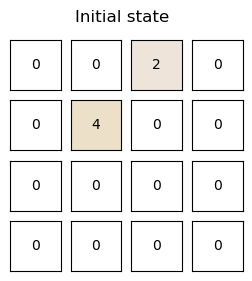

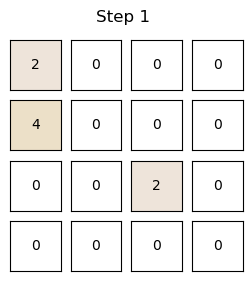

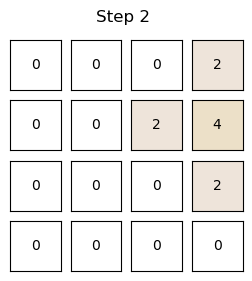

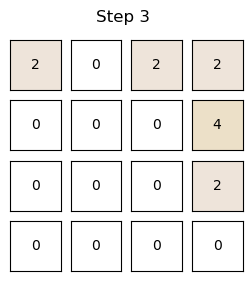

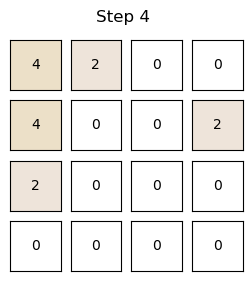

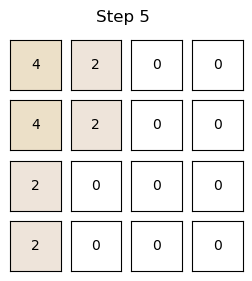

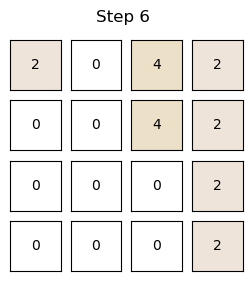

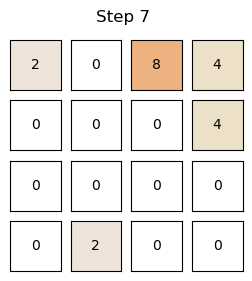

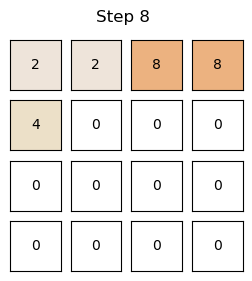

In [1]:
import numpy as np
import game  # Импортируем вашу скомпилированную библиотеку

# Создаем экземпляр игры
game_instance = game.Game(size=4, seed=42, negative_reward=-10.0, reward_mode="log2", cell_move_penalty=0.1)
game_instance.reset()

# Выводим начальное состояние
game_instance.draw_board(game_instance.current_state().reshape(4, 4), title='Initial state')

# Выполняем несколько шагов игры
np.random.seed(42) 
for i in range(8):
    action = np.random.randint(0, 4)  # Случайное действие
    game_instance.step(action, np.array([]))
    game_instance.draw_board(game_instance.current_state().reshape(4, 4), title=f'Step {i+1}')


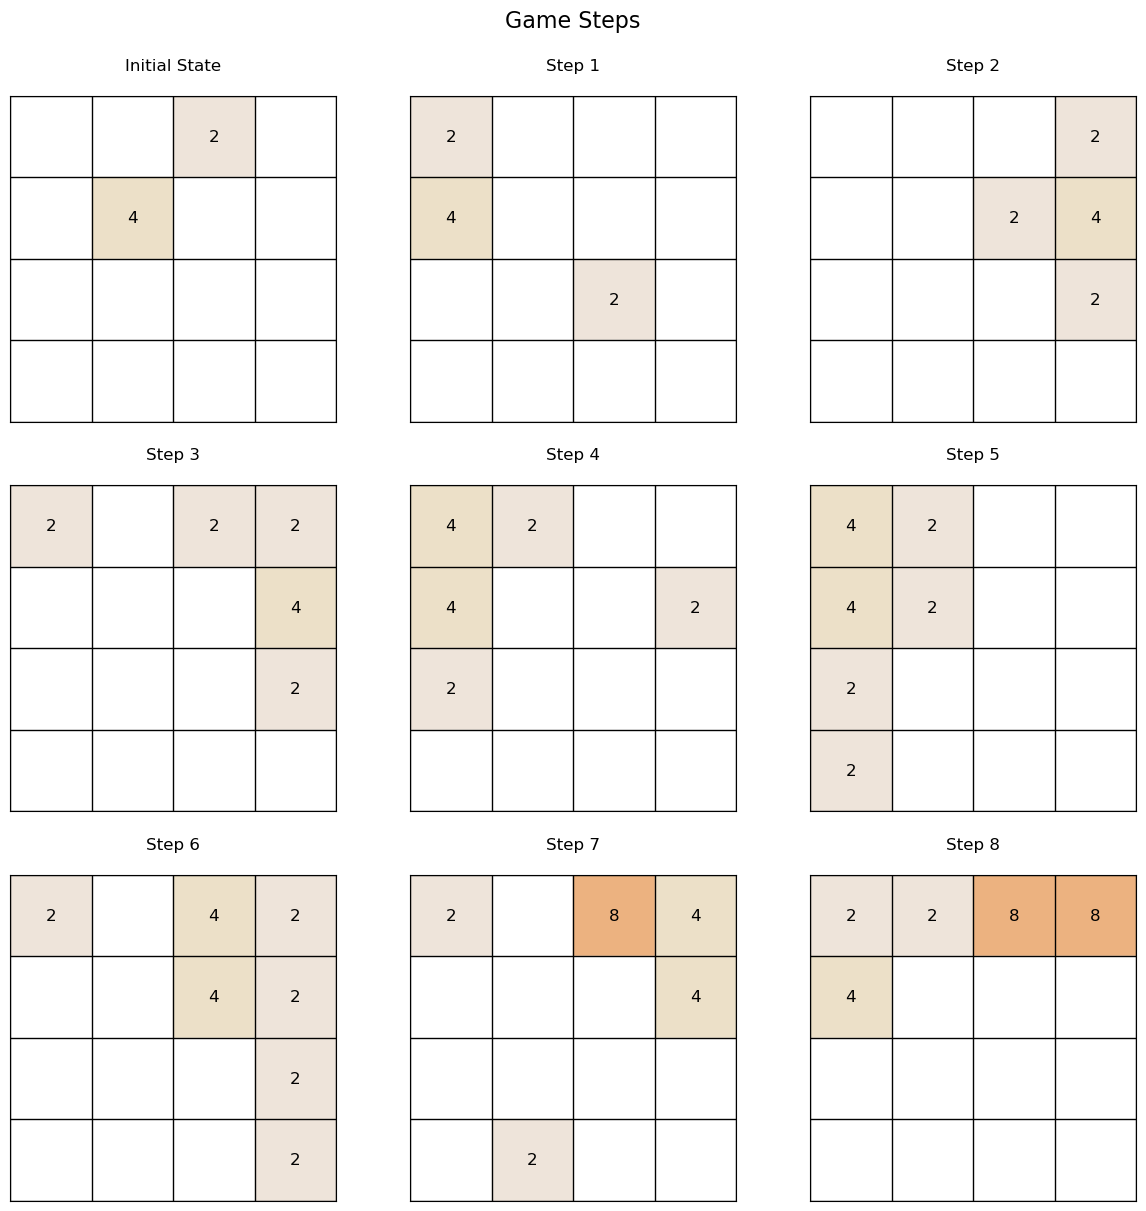

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import game  # Импортируем вашу скомпилированную библиотеку

# Создаем экземпляр игры
game_instance = game.Game(size=4, seed=42, negative_reward=-10.0, reward_mode="log2", cell_move_penalty=0.1)
game_instance.reset()

# Функция для рисования игрового поля в ячейке
def draw_board_in_cell(ax, state, title):
    """ Draws a colored game board in a single subplot with borders between tiles """
    cell_colors = {
        0: '#FFFFFF',
        2: '#EEE4DA',
        4: '#ECE0C8',
        8: '#ECB280',
        16: '#EC8D53',
        32: '#F57C5F',
        64: '#E95937',
        128: '#F3D96B',
        256: '#F2D04A',
        512: '#E5BF2E',
        1024: '#E2B814',
        2048: '#EBC502',
        4096: '#00A2D8',
        8192: '#9ED682',
        16384: '#9ED682',
        32768: '#9ED682',
        65536: '#9ED682',
        131072: '#9ED682',
    }

    ncols = 4  # Размер игрового поля (4x4)
    nrows = 4

    # Добавляем данные в каждую ячейку
    for r in range(nrows):
        for c in range(ncols):
            value = int(state[r * ncols + c])
            # Рисуем ячейку
            ax.add_patch(plt.Rectangle((c, 3 - r), 1, 1, color=cell_colors[value]))
            # Добавляем текст (если значение не равно 0)
            if value != 0:
                ax.text(c + 0.5, 3 - r + 0.5, str(value), 
                        horizontalalignment='center', verticalalignment='center', 
                        color='black' if value <= 8 else 'white', fontsize=12)

    # Рисуем границы между плитками
    for r in range(nrows + 1):
        ax.plot([0, 4], [r, r], color='black', linewidth=1)  # Горизонтальные линии
    for c in range(ncols + 1):
        ax.plot([c, c], [0, 4], color='black', linewidth=1)  # Вертикальные линии

    # Убираем метки осей
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=12)

# Создаем сетку для отображения 9 ходов (включая начальное состояние)
fig, axes = plt.subplots(3, 3, figsize=(12, 12), constrained_layout=True)
fig.suptitle('Game Steps', fontsize=16)

# Отображаем начальное состояние
initial_state = game_instance.current_state()
draw_board_in_cell(axes[0, 0], initial_state, '\nInitial State\n')

np.random.seed(42) 
for i in range(8):
    action = np.random.randint(0, 4)  # Случайное действие
    game_instance.step(action, np.array([]))

    # Получаем текущее состояние игрового поля
    current_state = game_instance.current_state()

    # Отображаем состояние в соответствующей ячейке
    row = (i + 1) // 3  # Смещаем индексы, чтобы начальное состояние было в [0, 0]
    col = (i + 1) % 3
    draw_board_in_cell(axes[row, col], current_state, f'\nStep {i+1}\n')


plt.savefig('game_steps.png', dpi=600) 
# Отображаем график
plt.show()

In [14]:
game_instance.get_score()

28.0

In [19]:
game_instance.get_steps()

8

In [22]:
game_instance.get_negative_reward()

-10.0

In [23]:
game_instance.get_done()

False